In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel('credit_card_fraud.xlsx')

In [5]:
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,10723,Orient,WA,488878,-1182105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49159047,-118186462,0
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,22011,Malad City,ID,421808,-112262,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43150704,-112154481,0
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,9629,Grenada,CA,416125,-1225258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,4165752,-122230347,0
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,777,High Rolls Mountain Park,NM,329396,-1058189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32863258,-106520205,0
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,685,Freedom,WY,430172,-1110292,471,"Education officer, museum",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43753735,-111454923,0


## Explore the data

In [6]:
# Display the first few rows of the dataset
df.head()

trans_date_trans_time    datetime64[ns]
merchant                         object
category                         object
amt                               int64
city                             object
state                            object
lat                               int64
long                              int64
city_pop                          int64
job                              object
dob                      datetime64[ns]
trans_num                        object
merch_lat                         int64
merch_long                        int64
is_fraud                          int64
dtype: object

In [7]:
# Check for missing values
df.isnull().sum()

trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
city                     0
state                    0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
# Get summary statistics
df.describe()

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud
count,3.396070e+05,3.396070e+05,3.396070e+05,3.396070e+05,3.396070e+05,3.396070e+05,339607.000000
mean,6.418283e+03,9.436832e+13,-9.793492e+05,1.071409e+05,2.561214e+15,-4.039109e+14,0.005247
std,1.485608e+04,6.368808e+14,3.541445e+05,2.930299e+05,9.562805e+15,2.170352e+15,0.072248
min,1.000000e+01,4.171000e+03,-1.656723e+06,4.600000e+01,3.950000e+02,-1.666707e+16,0.000000
25%,7.640000e+02,3.437950e+05,-1.189017e+06,4.710000e+02,3.566570e+07,-1.196960e+08,0.000000
50%,3.849000e+03,3.888810e+05,-1.066596e+06,1.645000e+03,3.955451e+07,-1.093799e+08,0.000000
75%,7.818000e+03,4.154030e+05,-9.404920e+05,3.543900e+04,4.290694e+07,-9.614442e+07,0.000000
max,1.683708e+06,4.567100e+15,-1.046600e+04,2.383912e+06,6.398484e+16,-9.600000e+02,1.000000


In [9]:
# Check the data types of each column
df.dtypes

trans_date_trans_time    datetime64[ns]
merchant                         object
category                         object
amt                               int64
city                             object
state                            object
lat                               int64
long                              int64
city_pop                          int64
job                              object
dob                      datetime64[ns]
trans_num                        object
merch_lat                         int64
merch_long                        int64
is_fraud                          int64
dtype: object

## Data Visualization

### Which Category has the most transactions?

category
entertainment      5785.139336
food_dining        4608.266256
gas_transport      5697.566873
grocery_net        4980.925672
grocery_pos       11346.169345
health_fitness     4938.668791
home               5185.449040
kids_pets          5074.186473
misc_net           7239.668718
misc_pos           5630.396924
personal_care      4452.159674
shopping_net       7902.243186
shopping_pos       7278.535131
travel             9851.029452
Name: amt, dtype: float64


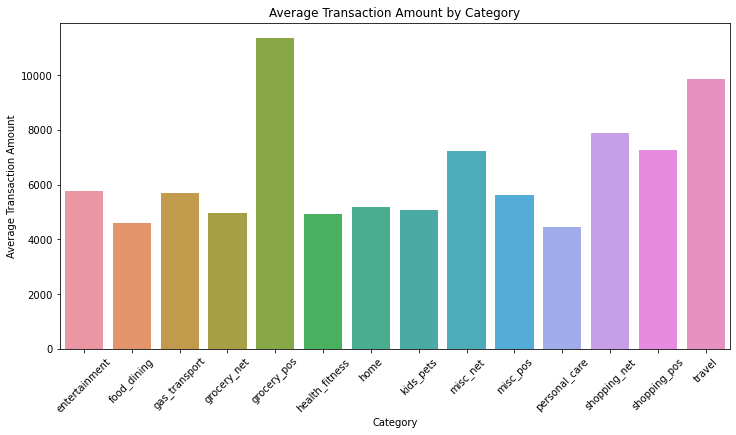

In [15]:
# Group data by 'category' and calculate average transaction amounts
category_avg_amt = df.groupby('category')['amt'].mean()
print(category_avg_amt)

# Plot a bar chart of average transaction amounts by category
plt.figure(figsize=(12, 6))
sns.barplot(x=category_avg_amt.index, y=category_avg_amt.values)
plt.xlabel('Category')
plt.ylabel('Average Transaction Amount')
plt.title('Average Transaction Amount by Category')
plt.xticks(rotation=45)
plt.show()

### Is date of birth of the card holder related to fraudulent transactions?

In [16]:
df['dob'] = pd.to_datetime(df['dob'])

In [17]:
from datetime import datetime

current_date = datetime.now()
df['age'] = (current_date - df['dob']).astype('<m8[Y]')

In [18]:
correlation = df['age'].corr(df['is_fraud'])
print(f"Correlation between age and is_fraud: {correlation}")

Correlation between age and is_fraud: 0.013091469777737308


#### The correlation of 0.013 between age and fraud transaction, suggests there is little to no linear relationship between the two variables

### Age Distribution for Fraudulent Transactions

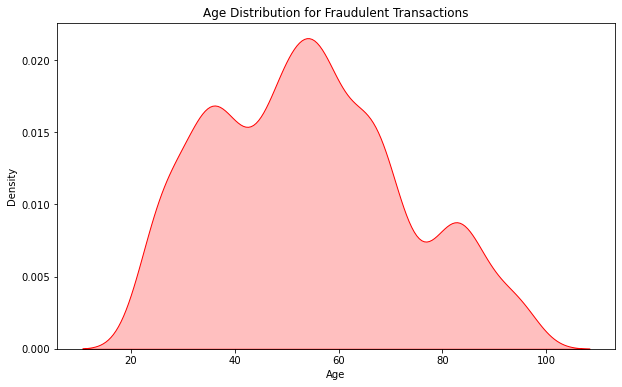

In [25]:
# Filter the DataFrame to include only fraudulent transactions
fraudulent_df = df[df['is_fraud'] == 1]

# Create a KDE plot to visualize the age distribution for fraudulent transactions
plt.figure(figsize=(10, 6))
sns.kdeplot(data=fraudulent_df, x='age', fill=True, color='red')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution for Fraudulent Transactions')

plt.show()

### Average transactions amount by State

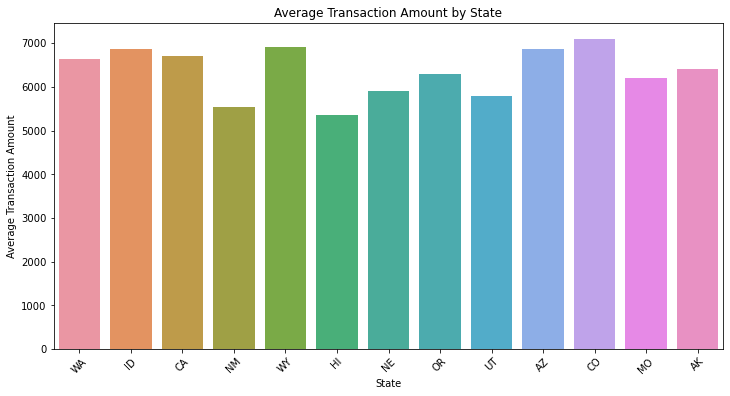

In [26]:
# Create a bar plot of the average transaction amount by state
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='amt', data=df, estimator=np.mean, ci=None)

# Set labels and title
plt.xlabel('State')
plt.ylabel('Average Transaction Amount')
plt.title('Average Transaction Amount by State')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

## Fraud Prediction

### Feature Engineering

In [33]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Extract the hour of the day
df['transaction_hour'] = df['trans_date_trans_time'].dt.hour

In [34]:
# Extract the day of the week
df['transaction_day_of_week'] = df['trans_date_trans_time'].dt.strftime('%A')

In [37]:
# Extract the month
df['transaction_month'] = df['trans_date_trans_time'].dt.strftime('%B')

In [54]:
#Create age column
df['age'] = (pd.to_datetime('now') - df['dob']).astype('<m8[Y]')  # Calculate age

In [55]:
#drop original date columns
df = df.drop(columns=['trans_date_trans_time', 'dob', 'transaction_day_of_week'])

### XGB Model Setup

In [41]:
!pip install xgboost

In [56]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#### We need to use one-hot-encoding to transform categorical values

In [57]:
categorical_cols = ['merchant', 'category', 'city', 'state', 'job']

# Use pandas to perform one-hot encoding
data_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [ ]:
data_encoded = data_encoded.drop(columns=['trans_num', 'transaction_month'])

In [63]:
# Define features (X) and target (y)
X = data_encoded.drop(columns=['is_fraud'])
y = data_encoded['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Training

In [65]:
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [66]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

Accuracy: 1.00
Precision: 0.93
Recall: 0.69
F1-score: 0.79


In [67]:
# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[67535    20]
 [  113   254]]


#### Parameter tuning

In [68]:
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameters to search
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='f1', verbose=2)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Use the best model from the grid search for further steps
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   9.3s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   9.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   9.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=  13.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=  15.5s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=  17.3s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=  19.5s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=  19.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=  24.9s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=  11.6s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=  12.3s
[CV] END ...learning_rate=0.1, max_depth=4, n_es

In [69]:
# Predict probabilities instead of binary outcomes
y_prob = best_model.predict_proba(X_test)[:, 1]

# Adjust the threshold (e.g., to 0.3)
threshold = 0.3
y_pred_adjusted = (y_prob > threshold).astype(int)

# Evaluate the adjusted predictions
adjusted_precision = precision_score(y_test, y_pred_adjusted)
adjusted_recall = recall_score(y_test, y_pred_adjusted)

print(f'Adjusted Precision: {adjusted_precision:.2f}')
print(f'Adjusted Recall: {adjusted_recall:.2f}')

Adjusted Precision: 0.87
Adjusted Recall: 0.71


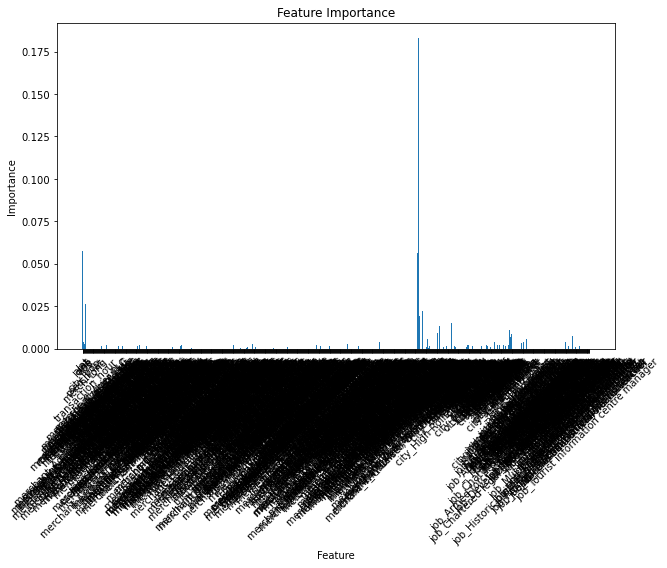

In [72]:
#feature importance plot
feature_importance = best_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance)
plt.xticks(range(len(feature_importance)), X.columns, rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

### This plot is not interpretable because of the high volume of features, we need to filter the number of features shown

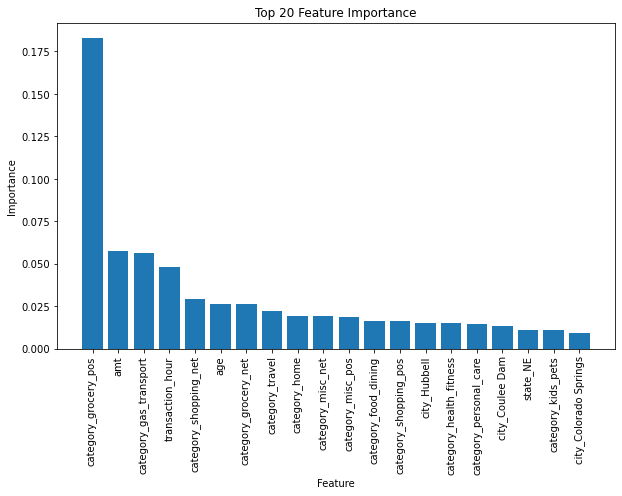

In [73]:
# Sort feature importances in descending order
sorted_feature_importance = sorted(zip(X.columns, feature_importance), key=lambda x: -x[1])

# Select the top N features to display
top_n = 20  # Change this number to your desired number of top features
top_features = [feature for feature, importance in sorted_feature_importance[:top_n]]

# Plot only the top N features
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_features)), [importance for feature, importance in sorted_feature_importance[:top_n]])
plt.xticks(range(len(top_features)), top_features, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top {} Feature Importance'.format(top_n))
plt.show()

### Model Evaluation

Accuracy: 1.00
Precision: 0.94
Recall: 0.65
F1-Score: 0.77
ROC AUC: 0.99


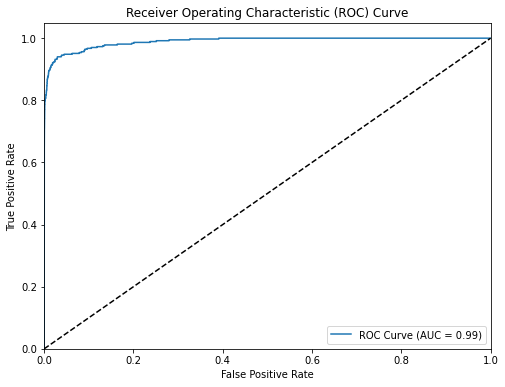

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Step 1: Predict on the test data using the best_model obtained from earlier steps
y_pred = best_model.predict(X_test)

# Step 2: Calculate Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

# Step 3: Print the Evaluation Metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

# Step 4: Visualize the ROC Curve
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()